In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'cleancreditcarddata.csv')
pd.set_option('display.max_columns',None)
df

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,0,0,0,0,0
1,0,49,5,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0
2,0,51,3,4,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,0,0,0,0,0
3,0,40,4,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0
4,0,40,3,0,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,4,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1,0,1,0,0,0,0
10123,1,41,2,3,1,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,0,0,0,0,0,0
10124,1,44,1,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,1,0,0,0,0,0
10125,1,30,2,4,1,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,0,0,1,0,0,0


In [3]:
y=df['Attrition_Flag']
x=df.drop('Attrition_Flag',axis=1)

In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [5]:
x.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,0,0,0,0,0
1,49,5,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0
2,51,3,4,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,0,0,0,0,0
3,40,4,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0
4,40,3,0,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,0,0,0,0,0


In [6]:
#checking how many of mainority and majority class

In [7]:
y.value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [8]:
8500/1627

5.224339274738783

In [9]:
#it's clear imablance data 

In [10]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

#saving the model

In [11]:
dt=DecisionTreeClassifier()

In [12]:
# spliting data

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=22)


In [14]:
#scalling

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=pd.DataFrame(ss.fit_transform(x_train),columns=x.columns)
x_test=pd.DataFrame(ss.transform(x_test),columns=x.columns)

In [16]:
x_train.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.200872,0.502078,-0.934085,-1.031610,0.128116,0.120947,-0.335536,-1.309605,-0.692375,-0.229900,-0.671820,-0.451368,-0.523816,-1.067076,-0.737251,0.506658,-0.939955,-0.92377,-0.800754,3.567984,-0.107178,-0.044486,-0.242805
1,0.325605,0.502078,1.964048,1.319514,0.003312,0.120947,-1.319670,1.394731,0.094887,-1.431403,0.222515,-0.223271,0.057211,0.464673,-0.253658,-0.995183,1.063881,1.08252,-0.800754,-0.280270,-0.107178,-0.044486,-0.242805
2,-0.547524,1.272115,0.804795,0.143952,-0.995116,0.763855,-1.319670,-0.408160,2.138414,-0.395751,2.173534,-0.565416,-0.816952,-1.152174,0.064495,-0.886354,1.063881,1.08252,-0.800754,-0.280270,-0.107178,-0.044486,4.118532
3,-1.919584,-1.037996,-0.354459,1.319514,0.003312,0.120947,0.648598,0.493286,-0.484549,0.749239,-0.551320,2.180870,-0.677086,-0.556493,-0.368193,0.517541,1.063881,1.08252,-0.800754,-0.280270,-0.107178,-0.044486,-0.242805
4,-0.298059,-0.267959,0.804795,1.319514,-0.121491,0.120947,-1.319670,0.493286,2.830144,0.689041,2.768480,0.483829,-0.787813,-0.556493,-0.147607,-0.813801,1.063881,1.08252,-0.800754,-0.280270,-0.107178,-0.044486,4.118532


In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8101, 23), (2026, 23), (8101,), (2026,))

In [18]:
y_train.value_counts()

Attrition_Flag
0    6805
1    1296
Name: count, dtype: int64

In [19]:
#treating imablance data

In [20]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
x_train,y_train=us.fit_resample(x_train,y_train)


In [21]:
x_train.shape,y_train.shape,

((2592, 23), (2592,))

In [22]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_train=pd.DataFrame(pca.fit_transform(x_train))
x_test=pd.DataFrame(pca.transform(x_test))

In [23]:
x_train.shape,y_train.shape,

((2592, 17), (2592,))

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
from sklearn.tree import plot_tree

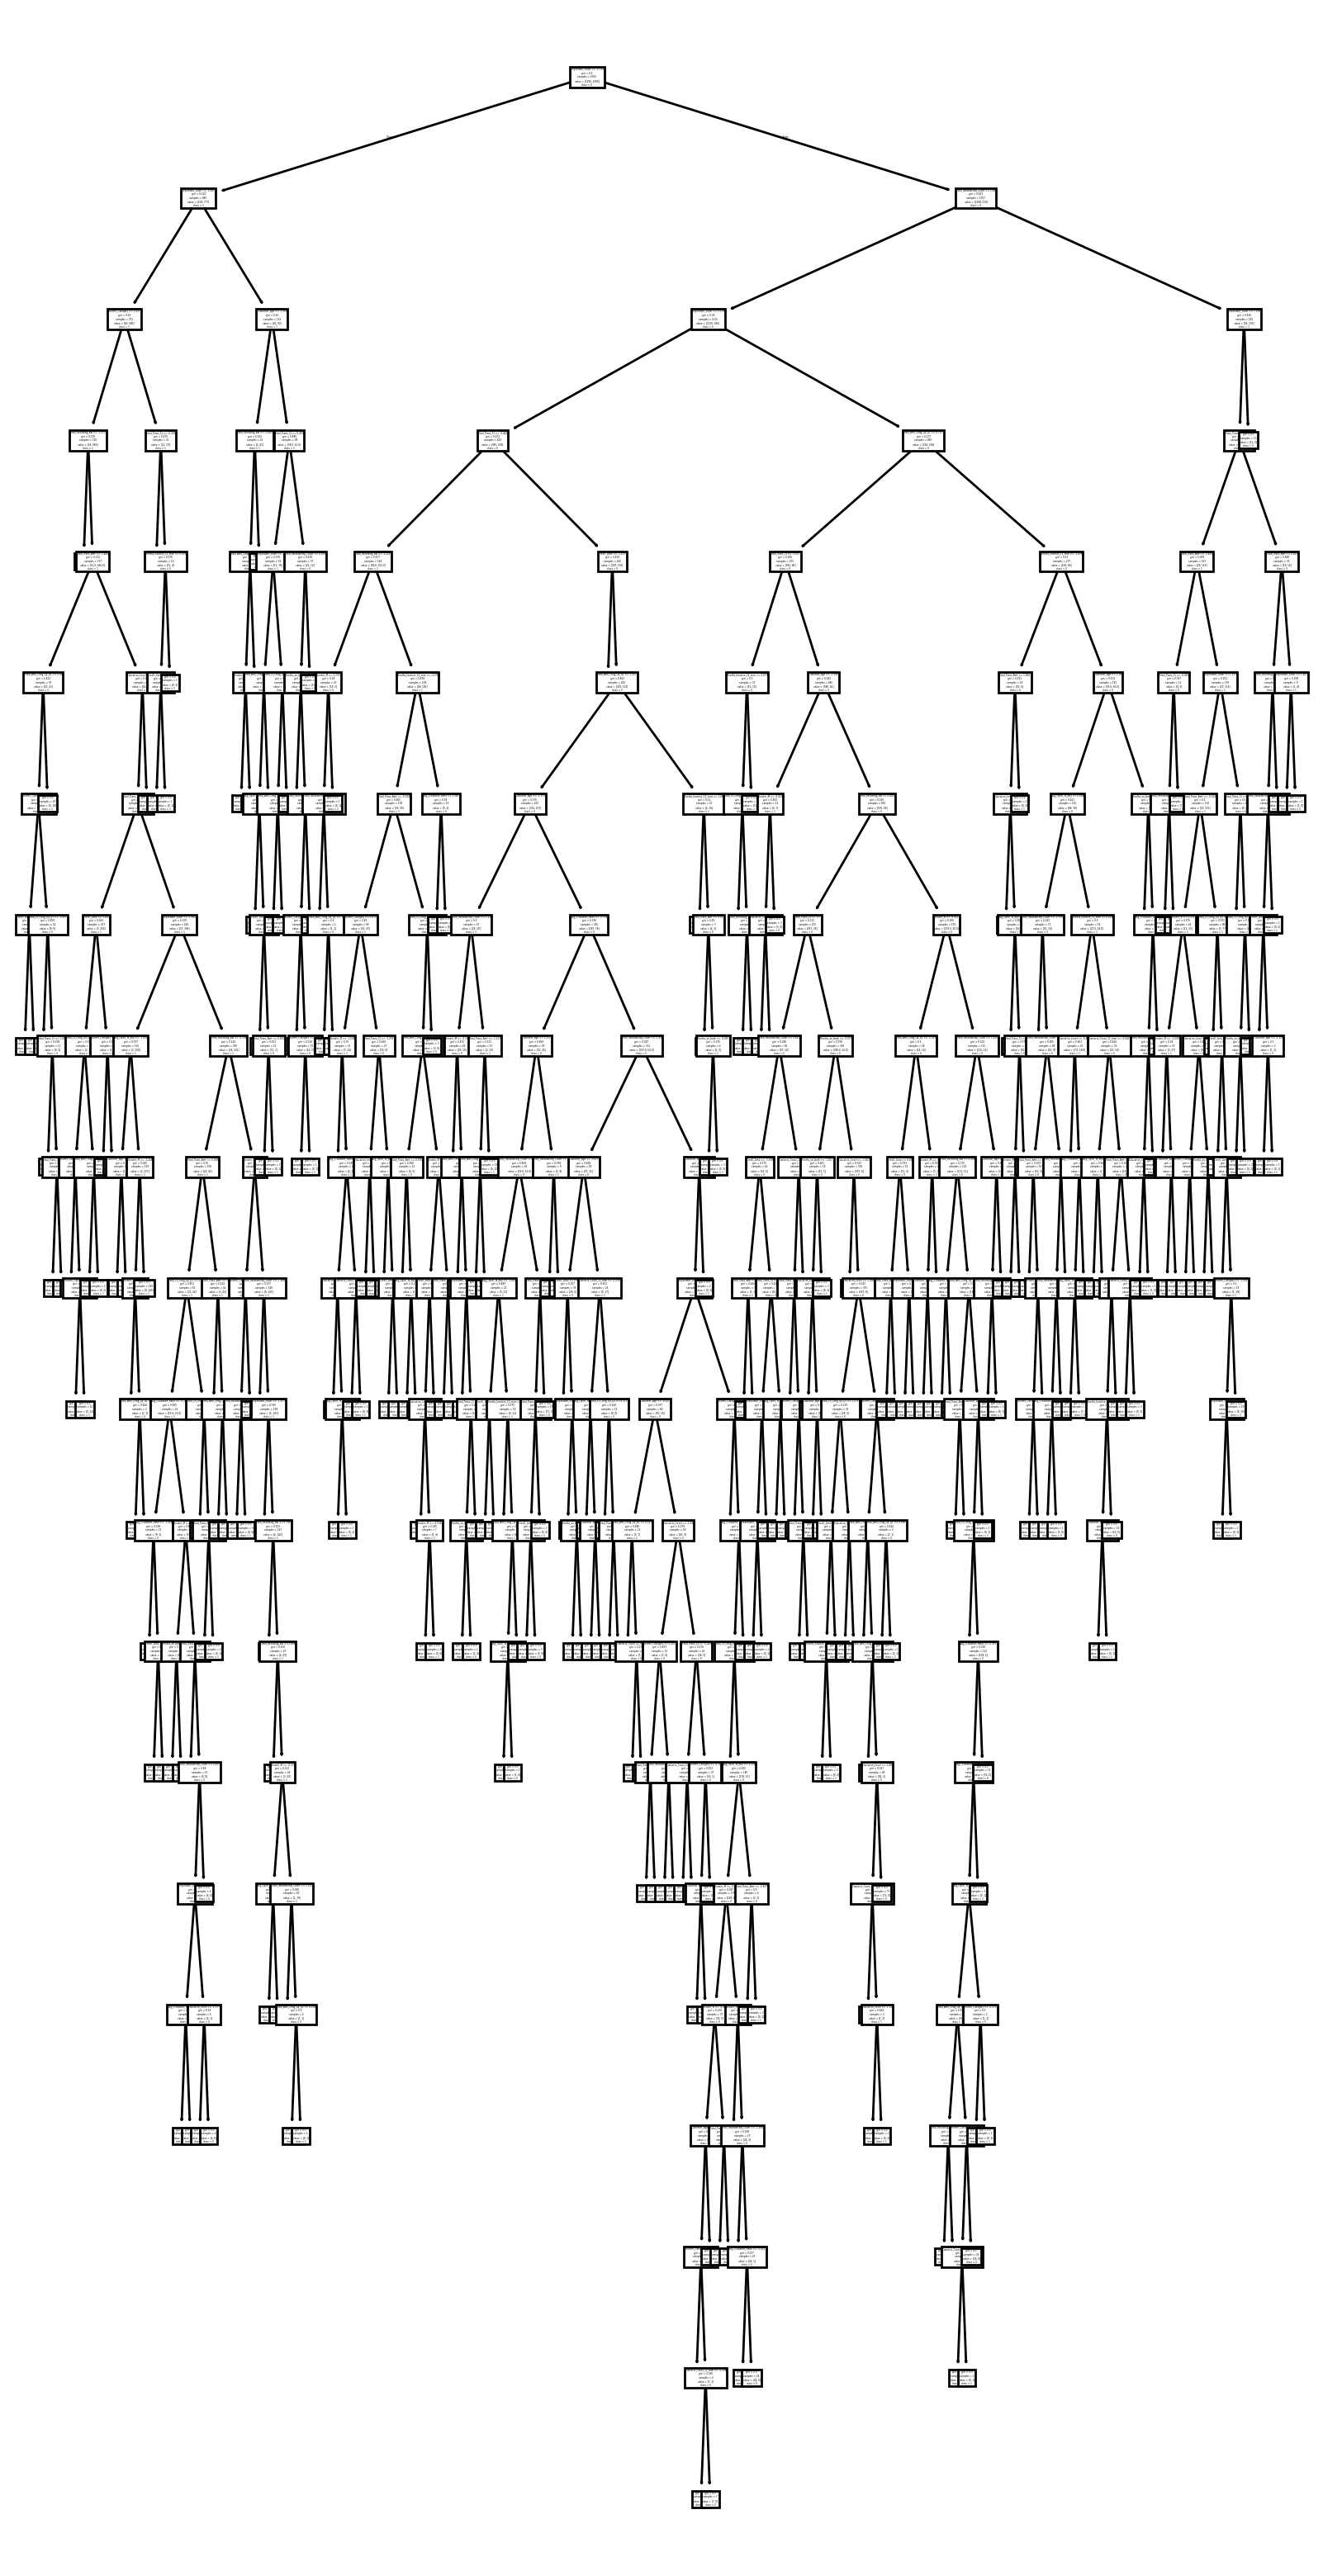

In [29]:
plt.figure(figsize=(10,20),dpi=200)
plot_tree(dt,feature_names=x.columns,class_names=['0','1'])
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

In [65]:
estimator=DecisionTreeClassifier(class_weight='balanced')
param_grid={'criterion':['gini','entropy'],'max_depth':list(range(1,20))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [33]:
dtc=grid.best_estimator_
dtc

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)

In [34]:
#extractin  imporatant columns

In [35]:
feat_imp=pd.DataFrame(dtc.feature_importances_,index=x_train.columns,columns=['importances'])
feat_imp

,importances
0,0.000000
1,0.738483
2,0.000000
3,0.011017
4,0.000000
5,0.102969
6,0.012348
7,0.000000
8,0.000000
9,0.000000


In [36]:
imp=feat_imp[feat_imp['importances']>0].index.tolist()
imp

[1, 3, 5, 6, 11, 12, 13]

In [37]:
type(imp)

list

In [38]:
x_train=x_train[imp]
x_test=x_test[imp]

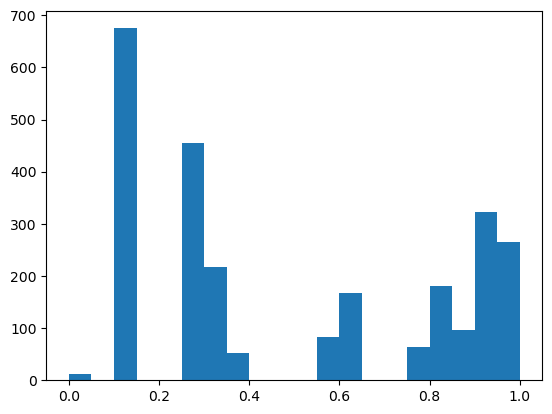

In [40]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,class_weight='balanced')
model.fit(x_train,y_train)
ypred_train=model.predict_proba(x_train)[:,1]
plt.hist(ypred_train,bins=20)
plt.show()
# print('train:',accuracy_score(y_train,ypred_train))
# print('cv:',cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy').mean())

In [57]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,class_weight='balanced')
model.fit(x_train,y_train)
ypred_train=model.predict_proba(x_train)[:,1]
ypred_train=(ypred_train>0.35).astype(int)
ypred_test=model.predict(x_test)
print('train:',accuracy_score(y_train,ypred_train))
print('cv:',cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy').mean())

train: 0.8051697530864198
cv: 0.7962937338659881


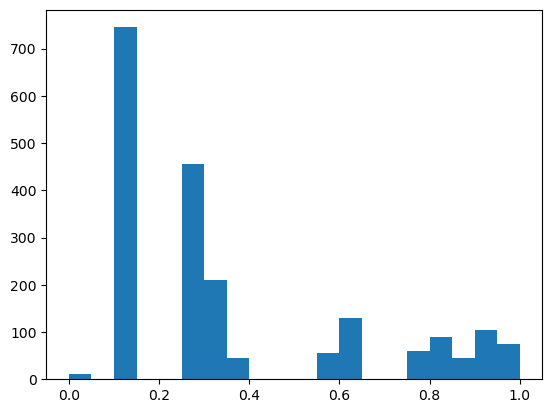

In [58]:
ypred_test=model.predict_proba(x_test)[:,1]
plt.hist(ypred_test,bins=20)
plt.show()
# print('test:',accuracy_score(y_test,ypred_test))

In [59]:
ypred_test=model.predict_proba(x_test)[:,1]
ypred_test=(ypred_test>0.35).astype(int)
print('test:',accuracy_score(y_test,ypred_test))

test: 0.7833168805528135


In [60]:
# classificatio report

In [61]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1695
           1       0.41      0.75      0.53       331

    accuracy                           0.78      2026
   macro avg       0.68      0.77      0.69      2026
weighted avg       0.85      0.78      0.81      2026



In [62]:
print(roc_auc_score(y_train,ypred_train))

0.8051697530864198
